# TRABAJO FINAL MINERIA DE DATOS

# EXPLORACIÓN Y PRE-TRATAMIENTO DE DATOS

## Importación de datos

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
tsunamis = pd.read_csv('tsunamis.tsv', sep = '\t')

In [2]:
tsunamis.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE,REGION_CODE,MAXIMUM_WATER_HEIGHT,ABE,IIDA,SOLOVIEV,WARNING_STATUS,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,HOUSES_DAMAGED,HOUSES_DAMAGED_DESCRIPTION,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,SYRIA,NaN,SYRIAN COASTS,35.683,35.80,50.0,NaN,NaN,NaN,6.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,NaN,GREECE,NaN,THERA ISLAND (SANTORINI),36.400,25.40,50.0,90.0,NaN,NaN,6.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,SYRIA,NaN,SYRIAN COASTS,35.683,35.80,50.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,TURKEY,NaN,"IONIAN COASTS, TROAD",39.960,26.24,50.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,ISRAEL,NaN,ISRAEL AND LEBANON COASTS,NaN,NaN,50.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Características básicas de los datos

### Tamaño de datos

In [3]:
print('La base de datos "tsunamis" cuenta con ' + str(tsunamis.shape[0]) + ' filas y ' 
      + str(tsunamis.shape[1]) +' columnas.')

La base de datos "tsunamis" cuenta con 2601 filas y 46 columnas.


### Lista de variables y tipos de datos

#### Tsunamis

In [4]:
pd.DataFrame(tsunamis.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
ID,int64
YEAR,int64
MONTH,float64
DAY,float64
HOUR,float64
MINUTE,float64
SECOND,float64
EVENT_VALIDITY,float64
CAUSE_CODE,float64
FOCAL_DEPTH,float64


###  Análisis de series temporales

#### Tsunamis 

In [5]:
count_tsunamis = tsunamis.groupby([u'YEAR'])[u'YEAR'].count().reset_index(name='count')

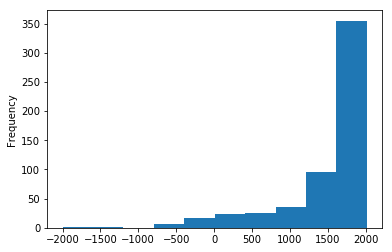

In [6]:
%matplotlib inline
count_tsunamis[u'YEAR'].plot(kind='hist')

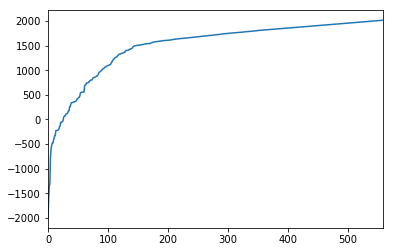

In [7]:
count_tsunamis[u'YEAR'].plot()

### Data threshold

In [8]:
tsunamis = tsunamis.sort_values('YEAR',ascending=False).head(int(tsunamis.shape[0]*0.8))

### Identificación de Missing values 

In [9]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns [mis_val_table_ren_columns['% of Total Values'] <= 70].sort_values('Missing Values', ascending=False)

#### Tsunamis

In [10]:
missing_values_table(tsunamis)

,Missing Values,% of Total Values
TOTAL_DAMAGE_DESCRIPTION,1271,61.105769
SECOND,1228,59.038462
FOCAL_DEPTH,1216,58.461538
SOLOVIEV,1162,55.865385
MAXIMUM_WATER_HEIGHT,1091,52.451923
MINUTE,876,42.115385
PRIMARY_MAGNITUDE,846,40.673077
HOUR,823,39.567308
LATITUDE,269,12.932692
LONGITUDE,269,12.932692


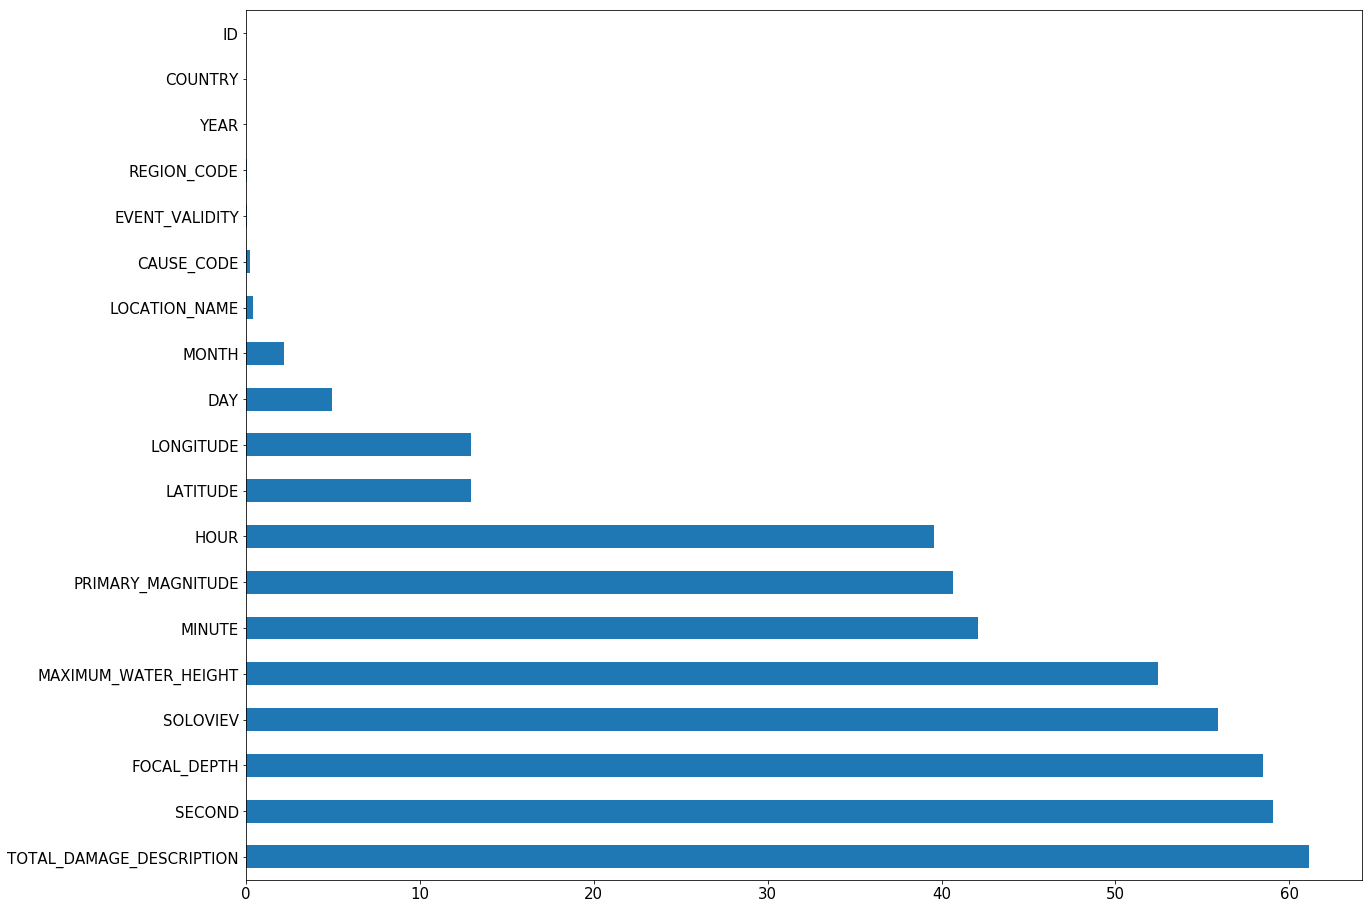

In [11]:
% matplotlib inline
import matplotlib.pyplot as plt
missing_values_table(tsunamis)['% of Total Values'].plot(kind='barh', figsize = (20,16)).tick_params(labelsize=15)

### Tratamiento de Missing values 

#### Selección de variables

In [12]:
columnas = list(missing_values_table(tsunamis).index)
columnas.remove('SOLOVIEV')
columnas.remove('LATITUDE')
columnas.remove('LONGITUDE')
columnas.remove('SECOND')
columnas.remove('HOUR')
columnas.remove('DAY')
columnas.remove('MONTH')
columnas.remove('LOCATION_NAME')
columnas.remove('REGION_CODE')
columnas.remove('COUNTRY')
columnas.remove('MINUTE')
columnas.remove('YEAR')
columnas.remove('ID')
tsunamis = tsunamis[columnas]

#### Selección de registros según Missing values (analizando el % de missing por registro) 

In [13]:
transpose = tsunamis.T
oks = list()

for column in transpose.columns:
    if transpose[pd.isnull(transpose[column])].shape[0]/transpose.shape[0] <= 0.15:
        oks.append(column)

#### Llenado de Missing values

In [14]:
filtered_df = transpose[oks].T
mode = filtered_df[u'TOTAL_DAMAGE_DESCRIPTION'].mode()
filtered_df[u'TOTAL_DAMAGE_DESCRIPTION'].fillna(mode.values[0],inplace=True)
filtered_df[u'EVENT_VALIDITY'] = filtered_df[u'EVENT_VALIDITY'].fillna(filtered_df['EVENT_VALIDITY'].mode())
filtered_df[u'CAUSE_CODE'] = filtered_df[u'CAUSE_CODE'].fillna(filtered_df['CAUSE_CODE'].mode())
filtered_df[u'FOCAL_DEPTH'] = filtered_df[u'FOCAL_DEPTH'].fillna(filtered_df['FOCAL_DEPTH'].mean())
filtered_df[u'PRIMARY_MAGNITUDE'] = filtered_df[u'PRIMARY_MAGNITUDE'].fillna(filtered_df['PRIMARY_MAGNITUDE'].mean())
filtered_df[u'MAXIMUM_WATER_HEIGHT'] = filtered_df[u'MAXIMUM_WATER_HEIGHT'].fillna(filtered_df['MAXIMUM_WATER_HEIGHT'].mean())

### Estadísticos descriptivos 

#### Tsunamis

In [15]:
filtered_df.describe()

,TOTAL_DAMAGE_DESCRIPTION,FOCAL_DEPTH,MAXIMUM_WATER_HEIGHT,PRIMARY_MAGNITUDE,CAUSE_CODE,EVENT_VALIDITY
count,2080.000000,2080.000000,2080.000000,2080.000000,2075.000000,2079.000000
mean,1.432212,35.976852,5.946077,7.035089,1.852048,2.427609
std,0.851234,23.999474,19.271161,0.615219,2.327105,1.546964
min,1.000000,0.000000,0.010000,3.700000,0.000000,-1.000000
25%,1.000000,33.000000,1.000000,7.000000,1.000000,1.000000
50%,1.000000,35.976852,5.946077,7.035089,1.000000,3.000000
75%,1.000000,35.976852,5.946077,7.200000,1.000000,4.000000
max,4.000000,600.000000,524.600000,9.500000,11.000000,4.000000


###  Matriz de correlaciones

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def corr_1(df):
    sns.set(style="white") 
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

def corr_2(df):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = df.corr()
    return sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Tsunamis

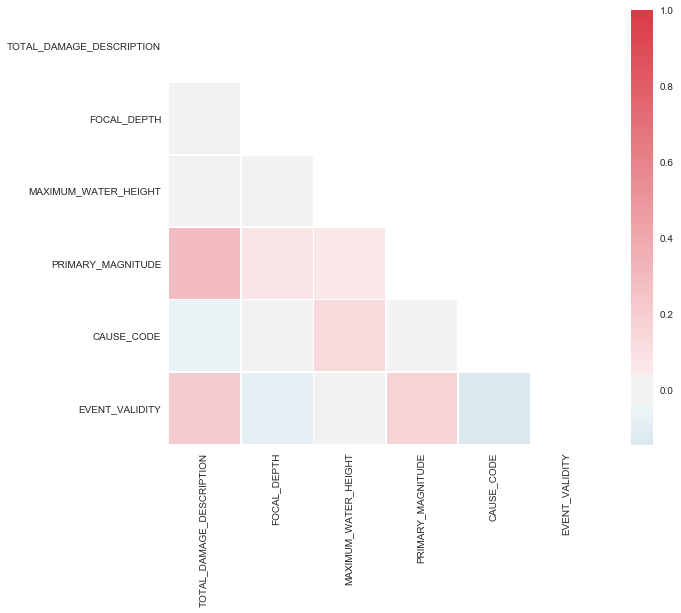

In [17]:
corr_1(filtered_df)

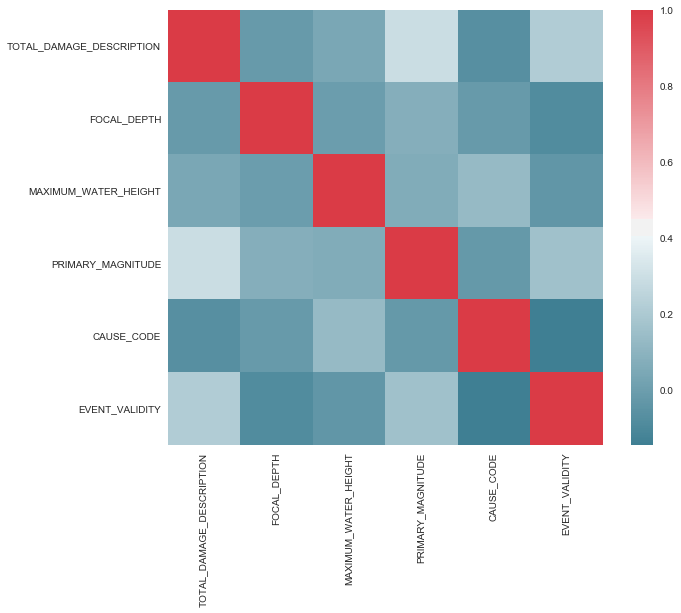

In [18]:
corr_2(filtered_df)

### Visualización espacio-temporal 

Tsunamis : https://ghherreramedina.carto.com/builder/650f7118-3ade-4e5d-82c6-10f2a3713be0/embed

Volcanes : https://ghherreramedina.carto.com/builder/fb6ffba5-f3a9-4993-a15a-f123aebd13db/embed

Terremetos : https://ghherreramedina.carto.com/builder/cd26c67a-ebc0-4ba8-837c-59fc8faf1cab/embed?state=%7B%22map%22%3A%7B%22ne%22%3A%5B-74.49641311694309%2C-269.29687500000006%5D%2C%22sw%22%3A%5B56.36525013685609%2C149.76562500000003%5D%2C%22center%22%3A%5B-22.268764039073968%2C-59.76562500000001%5D%2C%22zoom%22%3A2%7D%2C%22widgets%22%3A%7B%22ca790898-4763-4e95-99d0-a64c1b87b954%22%3A%7B%22normalized%22%3Atrue%7D%7D%7D

# DATA MINING

## Clustering 

### Definir función para calcular centroides de clusters 

In [21]:
import pandas as pd
import hdbscan
import numpy as np
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.path import Path
from matplotlib.spines import Spine
from __future__ import division

def calculate_centroids(data, cols_clusters, cols_to_delete = ['index']):
    """
    Input:
    - data: data frame containing all the clusters generated with K-means.
    - cols_clusters: list of columns containing the clusters numbers
    - cols_to_delete: list of columns to exclude from the analysis
    
    Output:
    - output_df: data frame containig the centroids for each cluster and clustering option
    """
    # List of columns from which to calculate the centroid
    cols_to_use = list(set(data.columns.tolist())-set(cols_clusters)-set(cols_to_delete))
    
    # Create output DF
    output_df = pd.DataFrame(columns=['number_of_clusters','cluster_id']+cols_to_use)
    for i in cols_clusters:
        df_to_concat = pd.pivot_table(data[cols_to_use+[i]],
                                        index=[i], aggfunc=np.mean)
        df_to_concat['cluster_id'] = df_to_concat.index
        df_to_concat.reset_index(drop=True)
        df_to_concat['number_of_clusters'] = df_to_concat.cluster_id.max()+1
        df_to_concat = df_to_concat[['number_of_clusters','cluster_id']+cols_to_use]
        output_df = pd.concat([output_df, df_to_concat], axis=0)
    
    output_df.reset_index(drop=True)
    
    # Return result
    return output_df

### Definir función que permitirá visualizar las características de los clusters/centroides (radar charts) 

In [20]:
def radar_chart(data, num_of_clusters_field, cluster_id_field, to_plot_fields, labels, save=True):
    
    """
    Create a radar chart for each cluster displaying the standardized variables values.
    
    Input:
    - df (m x n): Dataframe of data to be displayed.
    - num_of_clusters_field: string containing the name of the column describing the
                                number of groups of clusters
    - cluster_id_field: string containing the name of the field with the clusters ID per
                        group
    - to_plot_fields: list column names containing the variables to be plotted in the radar chart
    - labels: list of names to be plotted for each variable. It should be in the same order as the previous list.
    - city_name: string containing the name of the city for the graphs.
    - save: If True, the radar charts are saved. If False, not.
    
    Output:
    - radar charts which are saved as .png files (one for centroid)
    """
    
    def _radar_factory(num_vars):
    
        theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
        theta += np.pi/2

        def unit_poly_verts(theta):
            x0, y0, r = [0.5] * 3
            verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
            return verts

        class RadarAxes(PolarAxes):
            name = 'radar'
            RESOLUTION = 1

            def fill(self, *args, **kwargs):
                closed = kwargs.pop('closed', True)
                return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

            def plot(self, *args, **kwargs):
                lines = super(RadarAxes, self).plot(*args, **kwargs)
                for line in lines:
                    self._close_line(line)

            def _close_line(self, line):
                x, y = line.get_data()
                if x[0] != x[-1]:
                    x = np.concatenate((x, [x[0]]))
                    y = np.concatenate((y, [y[0]]))
                    line.set_data(x, y)

            def set_varlabels(self, labels):
                self.set_thetagrids(theta * 180/np.pi, labels)

            def _gen_axes_patch(self):
                verts = unit_poly_verts(theta)
                return plt.Polygon(verts, closed=True, edgecolor='k')

            def _gen_axes_spines(self):
                spine_type = 'circle'
                verts = unit_poly_verts(theta)
                verts.append(verts[0])
                path = Path(verts)
                spine = Spine(self, spine_type, path)
                spine.set_transform(self.transAxes)
                return {'polar': spine}

        register_projection(RadarAxes)

        return theta
    
    def radar_graph(labels = [], values = [], cluster=0, tot_clusters=1, save=True):
        colors = ['#226ce5','#BAB0AC','#f98e02','#a6c1ed','#f2d709','#2bbc23','#000000','#000000','#01DF3A']
        N = len(labels) 
        theta = _radar_factory(N)
        #max_val = max(max(optimum), max(values))

        # Define chart characteristics
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='radar')
        ax.set_ylim(0,1)
        ax.set_yticks(np.arange(0,1,0.2))
        ax.plot(theta, values, color=colors[cluster])#, color=colors[cluster]
        ax.set_title('Radar-Cluster '+str(int(cluster))+' of '+str(int(tot_clusters)), weight='bold', size='large')
        #ax.plot(theta, optimum, color='r')
        ax.set_varlabels(labels)
        #plt.show()

        # Save the radar chart in the working directory
        if save:
            plt.savefig('Output/'+'Charts/'+str(int(cluster))+' of '+str(int(tot_clusters))+' radar-cluster.png',
                        dpi=360)
            
        return

    data_pre_copy = data[[num_of_clusters_field,cluster_id_field]+to_plot_fields]
    
    # Iterate for each group of clusters
    for k in data_pre_copy[num_of_clusters_field].unique():
        # Normalize clustering centroids
        data_copy = data_pre_copy[(data_pre_copy[num_of_clusters_field] == k)]
        del data_copy[num_of_clusters_field]
        data_copy = data_copy.set_index(cluster_id_field)
        clusters = data_copy.index.tolist()
        for j in data_copy.columns.tolist():
            mini = data_copy[j].min()
            maxi = data_copy[j].max()
            data_copy[j] = (data_copy[j] - mini) / (maxi - mini)
    
    
        for i in clusters:    
            values = data_copy.loc[i].tolist()
            print values
            print "Cluster", str(i)
            radar_graph(labels, values, i, k)    
    
    return

### Ajustar el modelo a nuestros datos 

In [22]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True)

In [ ]:
clusterer.fit(filtered_df)

In [ ]:
filtered_df['labels'] = clusterer.labels_

In [ ]:
centroids = calculate_centroids(filtered_df, ['labels'],[])

### Visualización de características de clusters/centroides 

centroids

![Centroids](centroids.png)

In [ ]:
radar_chart(centroids,'number_of_clusters', 'cluster_id', 
            ['PRIMARY_MAGNITUDE','TOTAL_DAMAGE_DESCRIPTION', 'FOCAL_DEPTH', 'MAXIMUM_WATER_HEIGHT'],
           ['mag','dmg', 'depth', 'w_height'])

![Radar-1](radar_-1.jpeg)

![Radiar_0](radar_0.jpeg)

![Radiar_1](radar_1.jpeg)

In [ ]:
filtered_df[filtered_df['labels'] == -1].loc[:, :'EVENT_VALIDITY'].describe()

Cluster -1 
![centroids](Cluster-1.jpeg)

In [ ]:
filtered_df[filtered_df['labels'] == 0].loc[:, :'EVENT_VALIDITY'].describe()

Cluster 0 
![centroids](Cluster0.jpeg)

In [ ]:
filtered_df[filtered_df['labels'] == 1].loc[:, :'EVENT_VALIDITY'].describe()

Cluster 1 
![centroids](Cluster1.jpeg)

Visualización de clusters
![centroids](clusters_geo.jpeg)

## Clasificación (Decision trees y Logistic regression) 

### Separación de data en training y test 

In [ ]:
new_columns = [u'CAUSE_CODE',u'FOCAL_DEPTH',u'PRIMARY_MAGNITUDE', u'TOTAL_DAMAGE_DESCRIPTION', u'MAXIMUM_WATER_HEIGHT', u'EVENT_VALIDITY',u'labels']

In [ ]:
new_df = filtered_df[new_columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df[[u'CAUSE_CODE',u'FOCAL_DEPTH',u'PRIMARY_MAGNITUDE', u'TOTAL_DAMAGE_DESCRIPTION', u'MAXIMUM_WATER_HEIGHT', u'EVENT_VALIDITY']].values, new_df[u'labels'].values, test_size=0.15, random_state=42)

### Construcción de árbol  a partir de nuestra data 

In [ ]:
from sklearn import tree
q_niveles_arbol = 10
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = q_niveles_arbol)
clf = clf.fit(X_train, y_train)

### Visualización del árbol 

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph

![centroids](tree.png)

### Predicciones y validación del modelo 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

![centroids](report_tree.png)

### Entrenamiento de regresión logísticas multinomial con nuestra data 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf2 = LogisticRegression()
clf2 = clf2.fit(X_train, y_train)

### Predicciones y validación del modelo 

In [ ]:
y_pred2 = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

![centroids](report_LR.png)

### Comparación de poder predictivo entre ambos modelos 

In [ ]:
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = sorted(list(set(new_df[u'labels'].tolist())))
import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=sns.diverging_palette(220,10,as_cmap=True)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Plot normalized confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

![centroids](cf_tree.png)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred2) 
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

![centroids](cf_LR.png)

# GRACIAS!  